In [1]:
%pip install numpy==1.26.4
%pip install catboost
from catboost import CatBoostRegressor


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv("df_merged_cleaned.csv")

In [6]:
df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['week'] = df['dt'].dt.isocalendar().week

In [7]:
X = df.drop(columns=['Цена на арматуру'])
y = df['Цена на арматуру']

In [8]:
# Разделение на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Обучение модели CatBoost
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='MAE', verbose=100)
model.fit(X_train, y_train)

0:	learn: 8670.5782186	total: 63.6ms	remaining: 1m 3s
100:	learn: 1465.0861042	total: 216ms	remaining: 1.92s
200:	learn: 935.7509944	total: 364ms	remaining: 1.45s
300:	learn: 708.2219759	total: 498ms	remaining: 1.16s
400:	learn: 604.1432903	total: 645ms	remaining: 963ms
500:	learn: 491.2191760	total: 775ms	remaining: 772ms
600:	learn: 425.2147778	total: 910ms	remaining: 604ms
700:	learn: 373.1969932	total: 1.04s	remaining: 445ms
800:	learn: 338.1643464	total: 1.22s	remaining: 302ms
900:	learn: 303.8364856	total: 1.36s	remaining: 150ms
999:	learn: 277.5734822	total: 1.51s	remaining: 0us


In [10]:
# Прогнозирование на тестовой выборке
predictions = model.predict(X_test)

In [11]:
# Оценка модели
mae = mean_absolute_error(y_test, predictions)
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print('R2 score:', r2_score(y_test, predictions))
print('MSE score:', mean_squared_error(y_test, predictions))

Средняя абсолютная ошибка (MAE): 2495.3314300194447
R2 score: 0.9047327921995871
MSE score: 14359037.010338992


In [12]:
%pip install matplotlib

import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


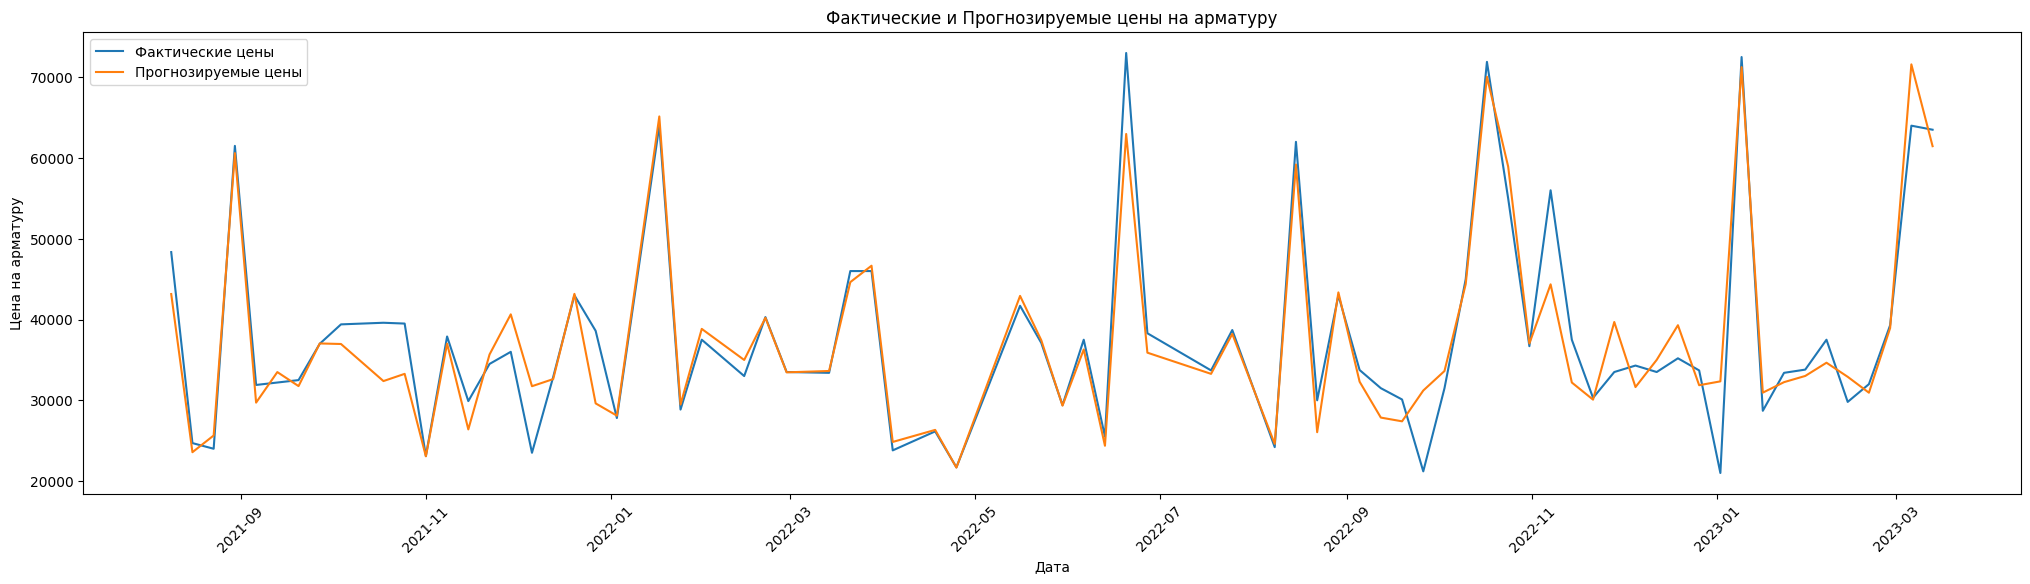

In [16]:
# Визуализация фактических и предсказанных цен
plt.figure(figsize=(25, 6))
plt.plot(df["dt"].iloc[-len(y_test):], y_test, label="Фактические цены")
plt.plot(df["dt"].iloc[-len(y_test):], predictions, label="Прогнозируемые цены")
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру")
plt.title("Фактические и Прогнозируемые цены на арматуру")
plt.xticks(rotation=45)
plt.show()